In [5]:
%matplotlib inline

from azureml import Workspace
import pandas as pd
import numpy as np

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [6]:
ws = Workspace()
ds = ws.datasets['Breast cancer dataset.csv']

Breast_cancer = ds.to_dataframe()


In [7]:
# Removing rows which contain '?' 
Breast_cancer.head()
(Breast_cancer.astype(str) == '?').any(1)
Breast_cancer = Breast_cancer[~(Breast_cancer.astype(str) == '?').any(1)]


In [17]:
Breast_cancer.status[Breast_cancer.status == "N"] = 1
Breast_cancer.status[Breast_cancer.status == "R"] = 0

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
# computing log Breast cancer
Breast_cancer['lnstatus'] = np.log(Breast_cancer.status)

AttributeError: 'int' object has no attribute 'log'

In [19]:
# Dropping columns
Breast_cancer.drop(["ID", "status"], axis = 1)

,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smothness,mean_compactness,mean_concavity,mean_concavepoints,mean_symmetry,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concavepoints,worst_symmetry,worst_fractaldim,tsize,pnodes
0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,139.70,1436.0,0.11950,0.19260,0.31400,0.11700,0.2677,0.08113,5.0,5
1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,3.0,2
2,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.11880,0.34490,0.34140,0.20320,0.4334,0.09067,2.5,0
3,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,2.0,0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,3.5,0
5,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,...,107.30,733.2,0.17060,0.41960,0.59990,0.17090,0.3485,0.11790,2.5,0
7,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,4.0,10
8,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,2.0,1
9,76,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,6.0,20
10,123,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,2.0,0


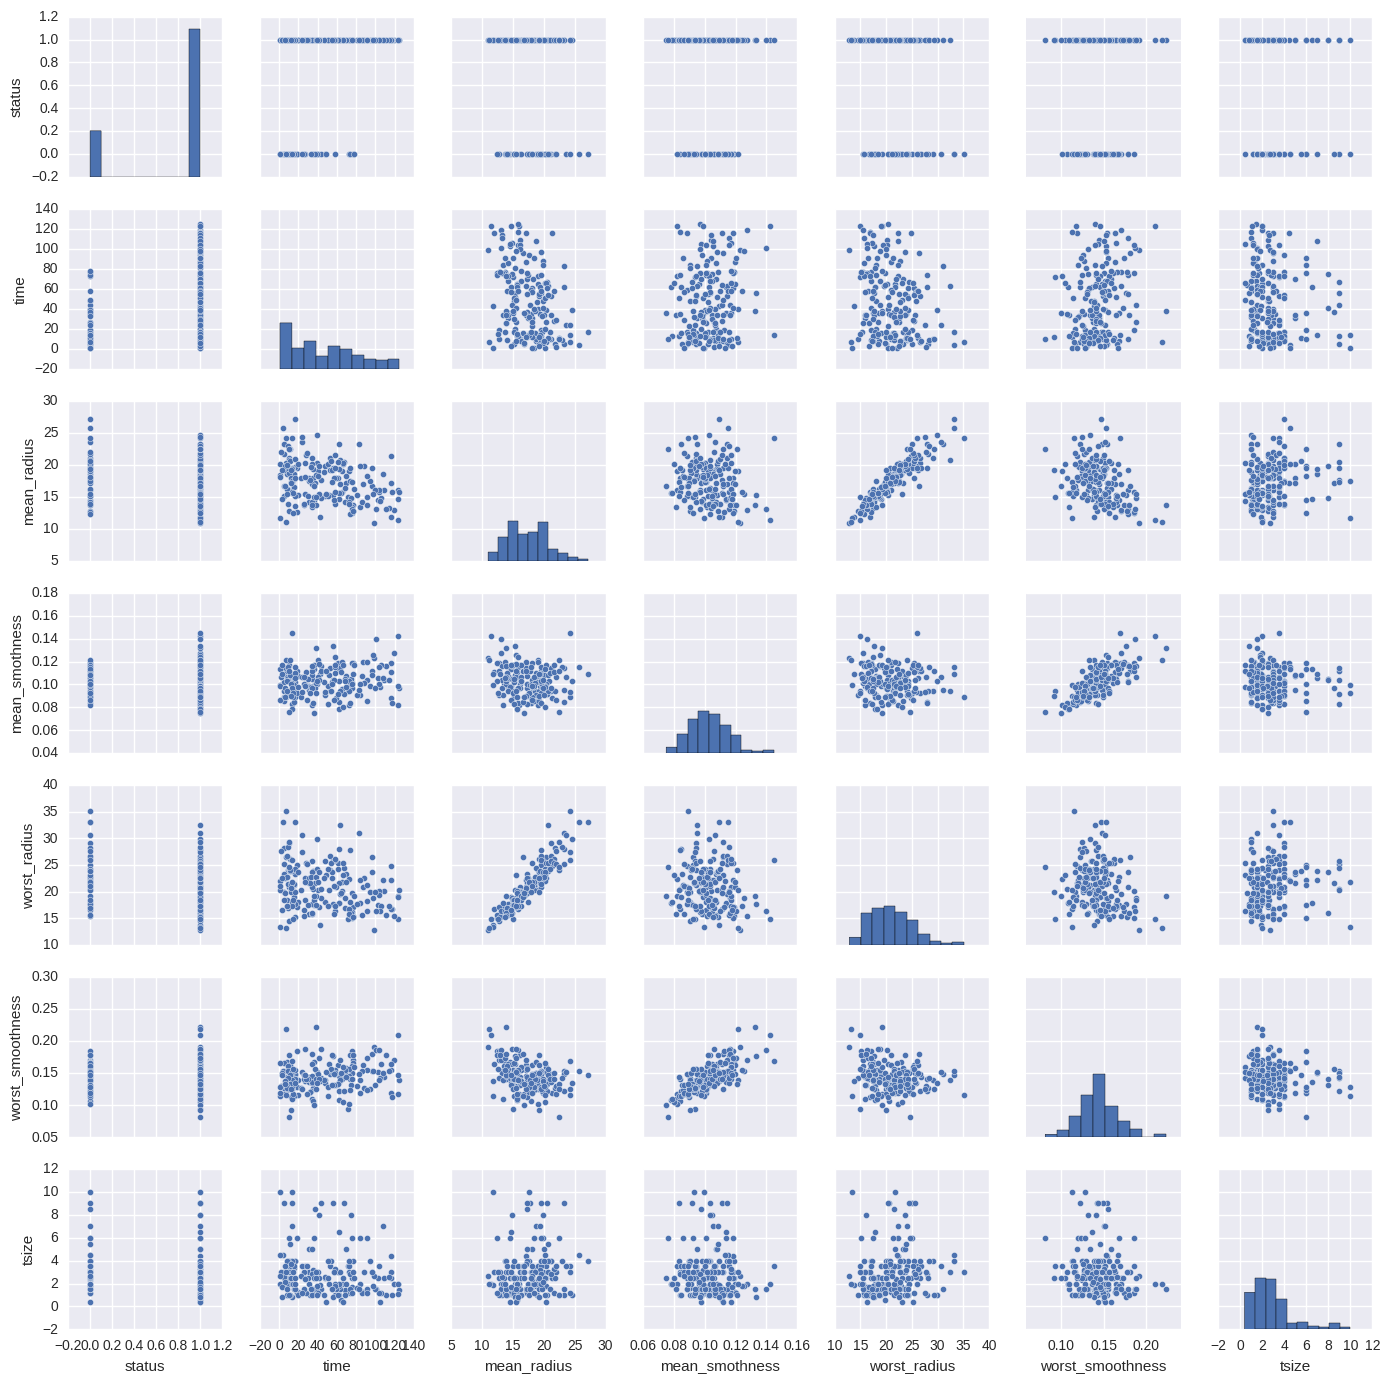

In [20]:
import seaborn as sns
num_cols = ["status", "time", "mean_radius", "mean_smothness", "worst_radius", "worst_smoothness", "tsize"] 
sns.pairplot(Breast_cancer[num_cols], size=2)

'status'

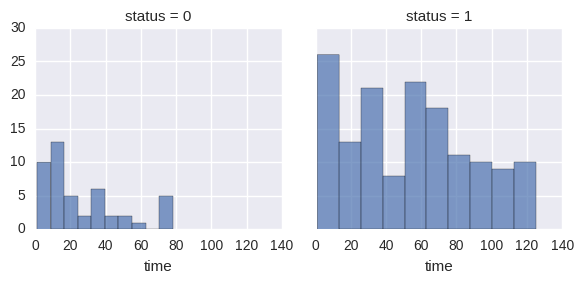

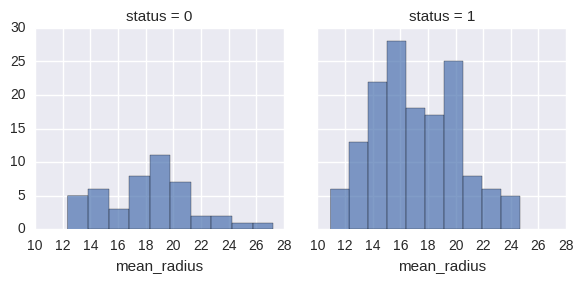

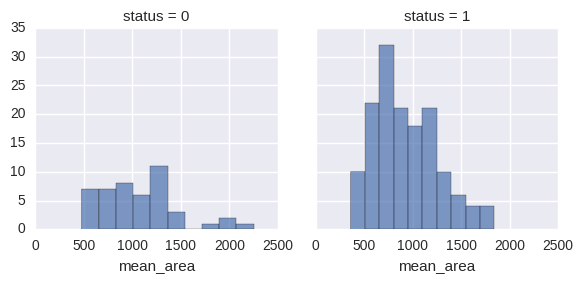

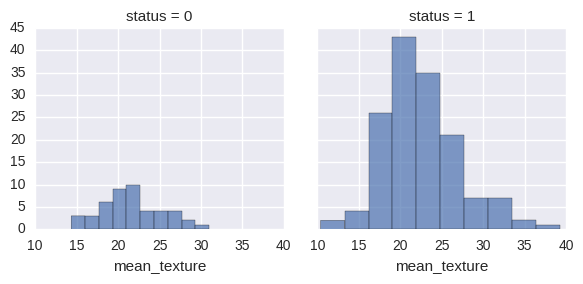

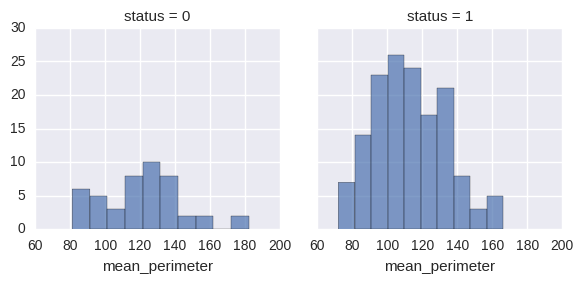

In [21]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["time",
               "mean_radius",
               "mean_area",
               "mean_texture", 
              "mean_perimeter"]

cond_hists(Breast_cancer, plot_cols2, 'status')

'status'

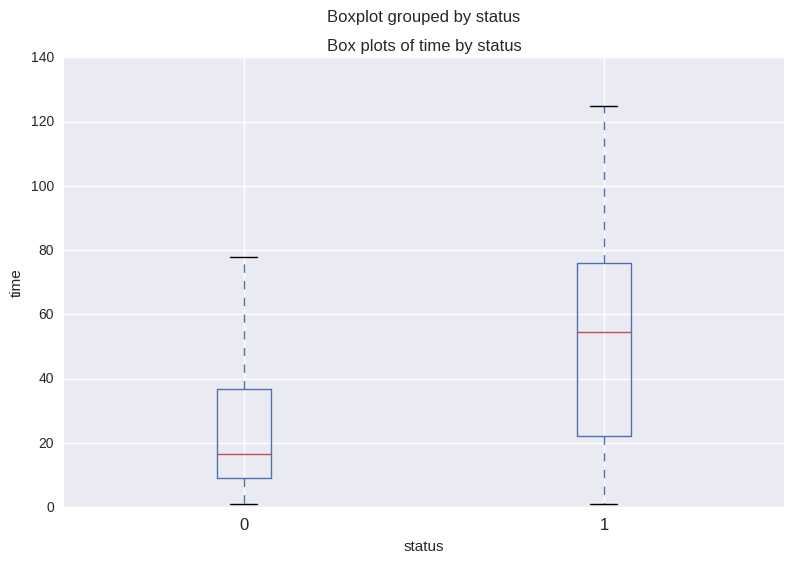

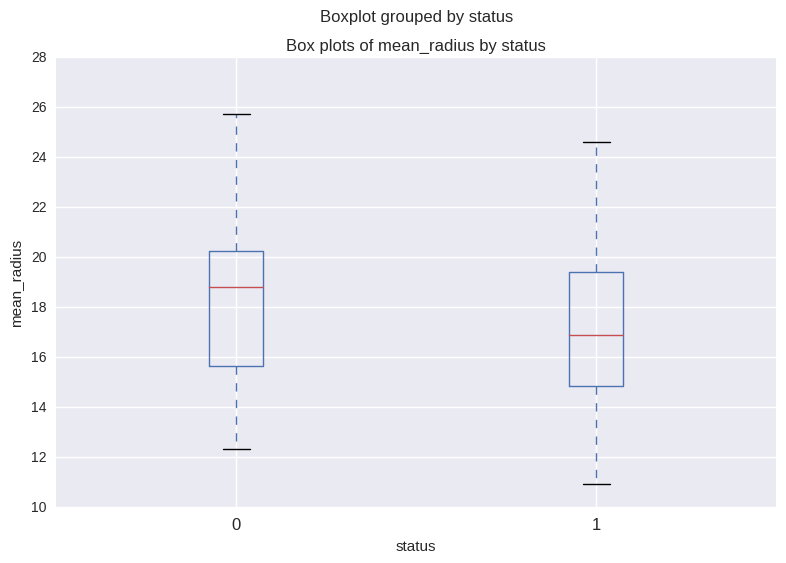

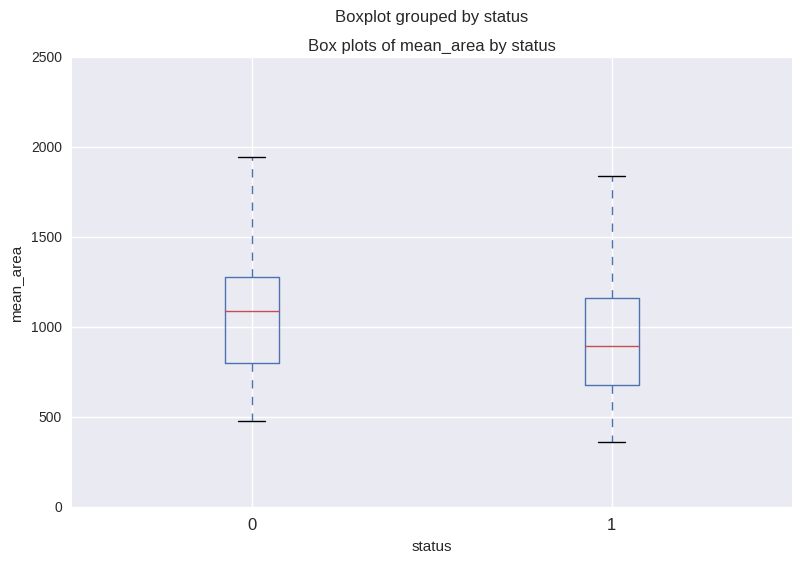

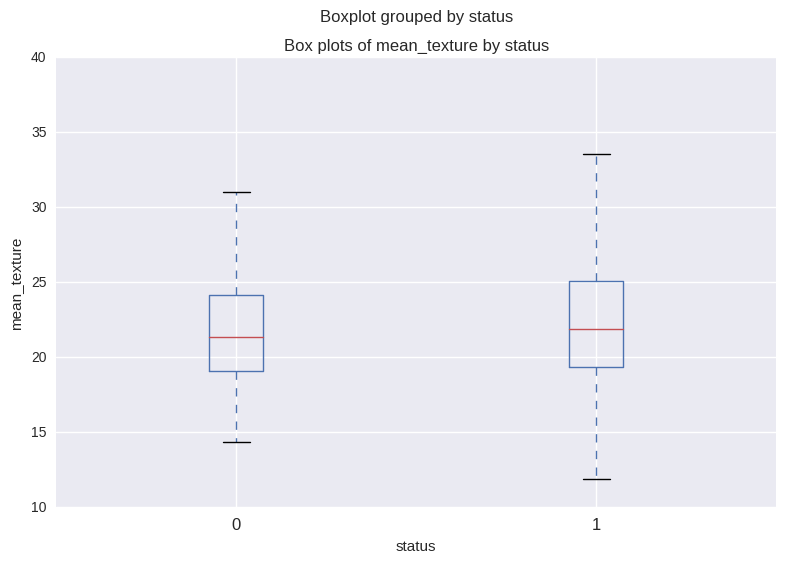

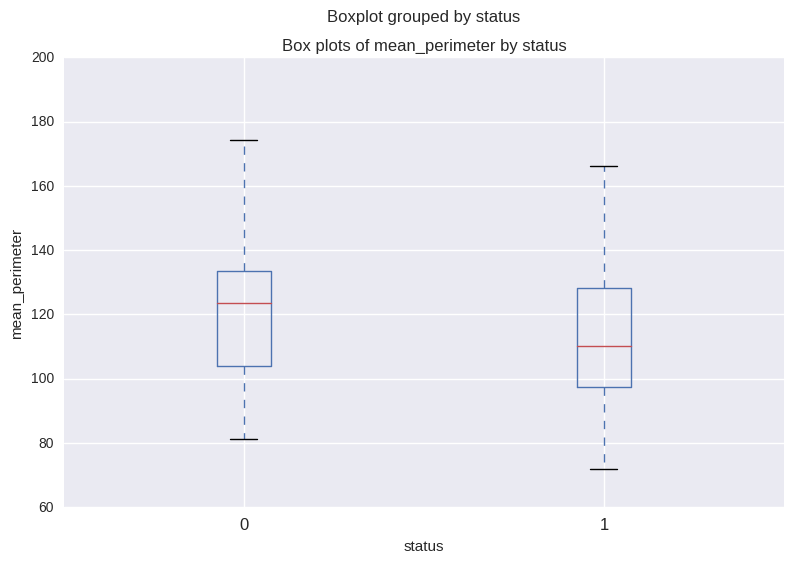

In [22]:
def auto_boxplot(df, plot_cols, by):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by 

auto_boxplot(Breast_cancer, plot_cols2, "status")

['mean_radius', 'mean_smothness', 'mean_area', 'worst_smoothness']

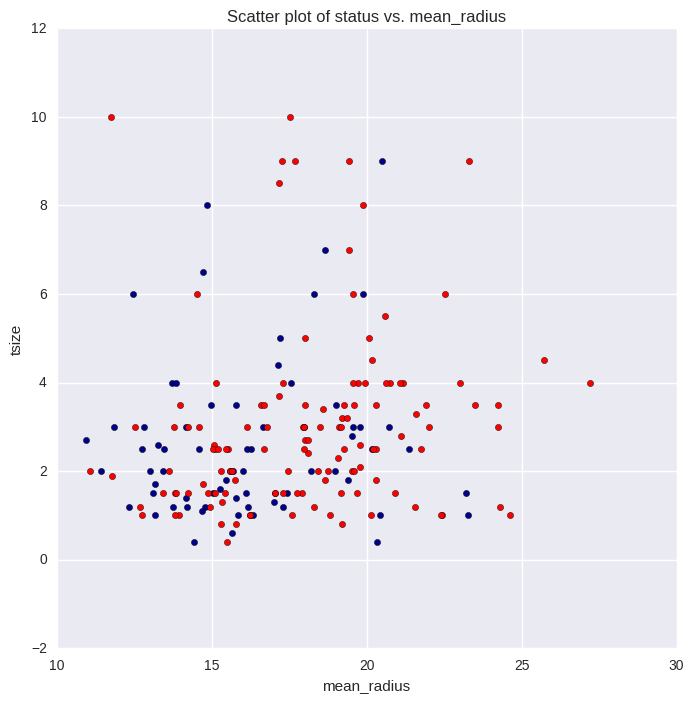

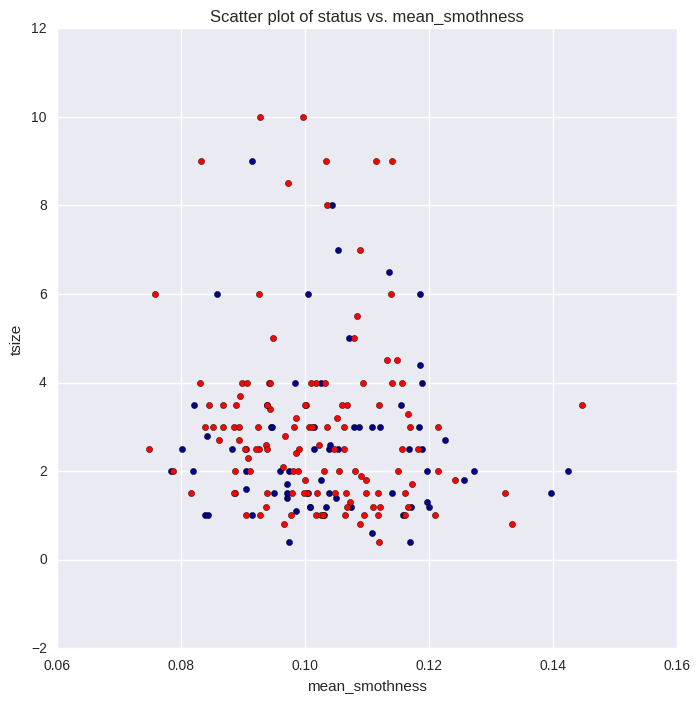

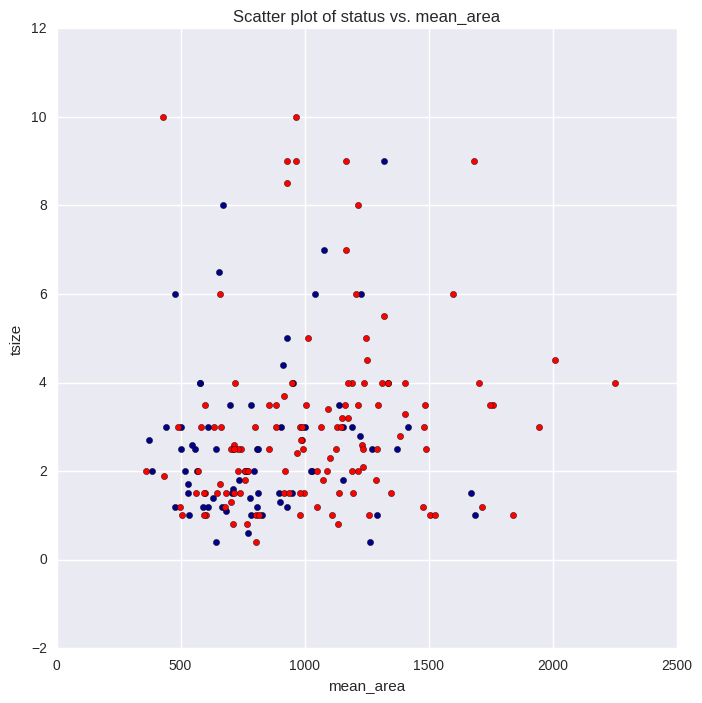

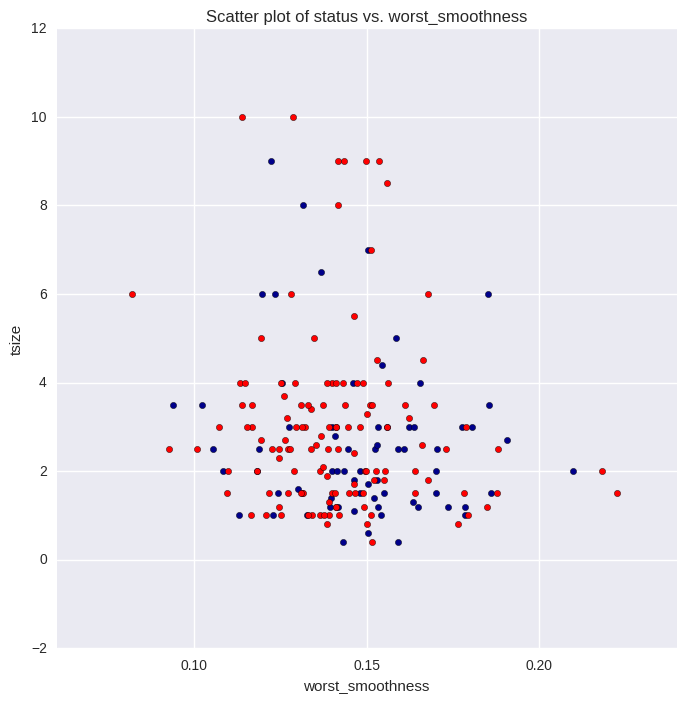

In [23]:
def Breast_cancer_scatter(df, plot_cols):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca()
        temp1 = df.ix[df['time'] >= 60 ]       
        temp2 = df.ix[df['time'] < 60  ]
        if temp1.shape[0] > 0:                     
            temp1.plot(kind = 'scatter', x = col, y = 'tsize' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'tsize' , 
                           ax = ax, color = 'Red') 
        ax.set_title('Scatter plot of status vs. ' + col)
    return plot_cols

## Defining columns for making scatter plots
plot_cols3 = ["mean_radius",
               "mean_smothness",
               "mean_area",
               "worst_smoothness"]

Breast_cancer_scatter(Breast_cancer, plot_cols3)